In [5]:
# Core analysis imports
import sqlite3
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = True


In [6]:
# Use a relative path so this works on any machine / GitHub clone
PROJECT_ROOT = Path("..").resolve()
DB_PATH = PROJECT_ROOT / "data" / "processed" / "vinyl_dw.sqlite"

if not DB_PATH.exists():
    raise FileNotFoundError(f"Warehouse not found at: {DB_PATH}")

query = """
SELECT
    artist,
    review_count,
    avg_score,
    min_score,
    max_score,
    first_review_year,
    last_review_year,
    track_count,
    total_streams,
    avg_streams_per_track,
    total_yt_views,
    avg_yt_views_per_track,
    total_yt_likes,
    total_yt_comments,
    avg_danceability,
    avg_energy,
    avg_valence
FROM vw_artist_critics_vs_streams;
"""

with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query(query, conn)

df.head()


,artist,review_count,avg_score,min_score,max_score,first_review_year,last_review_year,track_count,total_streams,avg_streams_per_track,total_yt_views,avg_yt_views_per_track,total_yt_likes,total_yt_comments,avg_danceability,avg_energy,avg_valence
0,!!!,7,6.800000,6.0,8.0,2004,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 Chainz,7,6.600000,4.5,7.7,2012,2016,10.0,1.995600e+09,199560008.7,8.983682e+08,89836823.6,6682858.0,212768.0,0.7164,0.6567,0.4616
2,21 Savage,1,7.000000,7.0,7.0,2016,2016,10.0,2.186417e+09,218641700.1,1.718228e+08,17182285.0,2824951.0,71734.0,0.7443,0.5863,0.2776
3,2Pac,1,4.100000,4.1,4.1,2006,2006,10.0,3.256832e+09,325683181.4,1.092522e+09,109252240.7,8491493.0,367821.0,0.8106,0.7650,0.6487
4,50 Cent,6,5.266667,1.8,7.0,2003,2014,10.0,4.059566e+09,405956641.4,4.560241e+09,456024072.7,27514380.0,672651.0,0.7149,0.7083,0.7081


In [7]:
df.info()
df.select_dtypes(include=["number"]).describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   artist                  644 non-null    object 
 1   review_count            644 non-null    int64  
 2   avg_score               644 non-null    float64
 3   min_score               644 non-null    float64
 4   max_score               644 non-null    float64
 5   first_review_year       644 non-null    int64  
 6   last_review_year        644 non-null    int64  
 7   track_count             391 non-null    float64
 8   total_streams           391 non-null    float64
 9   avg_streams_per_track   391 non-null    float64
 10  total_yt_views          390 non-null    float64
 11  avg_yt_views_per_track  390 non-null    float64
 12  total_yt_likes          390 non-null    float64
 13  total_yt_comments       390 non-null    float64
 14  avg_danceability        391 non-null    fl

,count,mean,std,min,25%,50%,75%,max
review_count,644.0,3.669255e+00,3.262147e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.300000e+01
avg_score,644.0,6.914941e+00,1.314922e+00,1.500000e+00,6.357500e+00,7.117500e+00,7.766667e+00,1.000000e+01
min_score,644.0,6.018478e+00,1.708123e+00,0.000000e+00,5.000000e+00,6.300000e+00,7.200000e+00,1.000000e+01
max_score,644.0,7.672205e+00,1.484619e+00,1.500000e+00,7.000000e+00,7.900000e+00,8.600000e+00,1.000000e+01
first_review_year,644.0,2.008522e+03,5.055938e+00,1.999000e+03,2.004000e+03,2.009000e+03,2.013000e+03,2.016000e+03
last_review_year,644.0,2.013297e+03,3.466873e+00,2.000000e+03,2.012000e+03,2.015000e+03,2.016000e+03,2.017000e+03
track_count,391.0,9.987212e+00,1.125014e-01,9.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
total_streams,391.0,2.074235e+09,2.300228e+09,7.580254e+06,6.246309e+08,1.221412e+09,2.775551e+09,1.525126e+10
avg_streams_per_track,391.0,2.130778e+08,2.305543e+08,7.580254e+05,6.654188e+07,1.310933e+08,2.833549e+08,1.525126e+09
total_yt_views,390.0,1.195777e+09,1.977332e+09,2.106778e+06,1.286824e+08,4.318869e+08,1.205032e+09,1.216759e+10


In [8]:
# Drop artists with no streams or no score (should be rare)
df_clean = df.dropna(subset=["avg_score", "total_streams"]).copy()

# Filter out artists with zero streams, just in case
df_clean = df_clean[df_clean["total_streams"] > 0].copy()

# Log scale often makes streaming distributions readable
df_clean["log10_total_streams"] = np.log10(df_clean["total_streams"])
df_clean["log10_avg_streams_per_track"] = np.log10(
    df_clean["avg_streams_per_track"].replace(0, np.nan)
)

df_clean[["artist", "review_count", "avg_score", "total_streams", "log10_total_streams"]].head()


,artist,review_count,avg_score,total_streams,log10_total_streams
1,2 Chainz,7,6.600000,1.995600e+09,9.300074
2,21 Savage,1,7.000000,2.186417e+09,9.339733
3,2Pac,1,4.100000,3.256832e+09,9.512795
4,50 Cent,6,5.266667,4.059566e+09,9.608480
6,A Tribe Called Quest,2,9.500000,7.406696e+08,8.869625


In [9]:
corr = df_clean[["avg_score", "total_streams", "log10_total_streams"]].corr()
corr


,avg_score,total_streams,log10_total_streams
avg_score,1.000000,-0.163066,-0.102970
total_streams,-0.163066,1.000000,0.817514
log10_total_streams,-0.102970,0.817514,1.000000


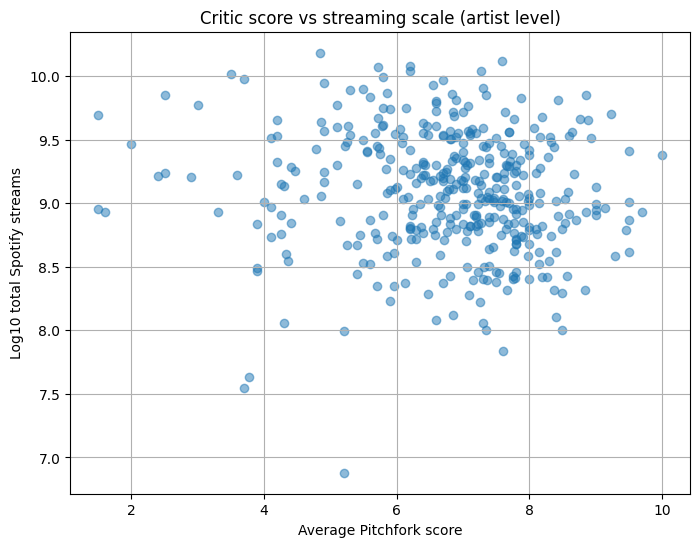

In [10]:
fig, ax = plt.subplots()

ax.scatter(
    df_clean["avg_score"],
    df_clean["log10_total_streams"],
    alpha=0.5,
)

ax.set_xlabel("Average Pitchfork score")
ax.set_ylabel("Log10 total Spotify streams")
ax.set_title("Critic score vs streaming scale (artist level)");



Total artists: 391, core artists: 283


,avg_score,log10_total_streams
avg_score,1.000000,-0.018942
log10_total_streams,-0.018942,1.000000


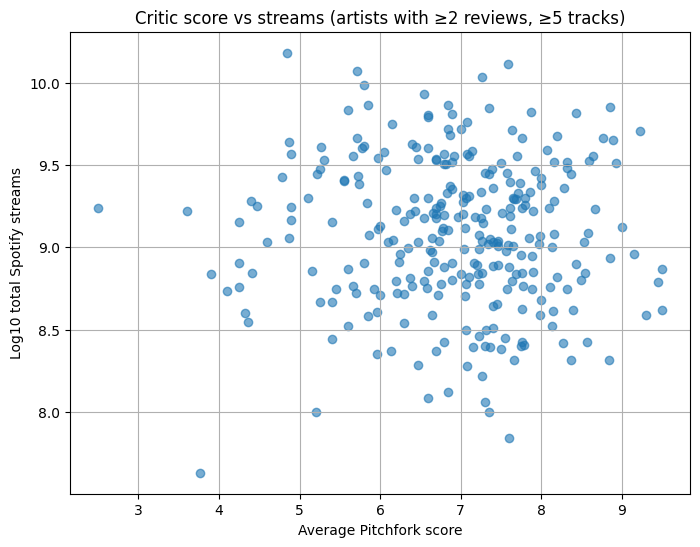

In [11]:
mask = (df_clean["review_count"] >= 2) & (df_clean["track_count"] >= 5)
df_core = df_clean[mask].copy()

print(f"Total artists: {len(df_clean)}, core artists: {len(df_core)}")

fig, ax = plt.subplots()

ax.scatter(
    df_core["avg_score"],
    df_core["log10_total_streams"],
    alpha=0.6,
)

ax.set_xlabel("Average Pitchfork score")
ax.set_ylabel("Log10 total Spotify streams")
ax.set_title("Critic score vs streams (artists with ≥2 reviews, ≥5 tracks)");

df_core[["avg_score", "log10_total_streams"]].corr()


In [12]:
# Define thresholds for quick slicing
high_score = 8.5
low_score = 6.0
low_streams = df_core["log10_total_streams"].quantile(0.3)
high_streams = df_core["log10_total_streams"].quantile(0.7)

underrated = df_core[
    (df_core["avg_score"] >= high_score)
    & (df_core["log10_total_streams"] <= low_streams)
].sort_values("avg_score", ascending=False)

overrated = df_core[
    (df_core["avg_score"] <= low_score)
    & (df_core["log10_total_streams"] >= high_streams)
].sort_values("log10_total_streams", ascending=False)

print("High-score, low-stream artists (rough 'underrated' set):")
underrated[["artist", "avg_score", "review_count", "total_streams"]].head(15)

print("\nLow-score, high-stream artists (rough 'overrated' set):")
overrated[["artist", "avg_score", "review_count", "total_streams"]].head(15)


High-score, low-stream artists (rough 'underrated' set):

Low-score, high-stream artists (rough 'overrated' set):


,artist,avg_score,review_count,total_streams
438,Post Malone,4.850000,2,1.525126e+10
98,Coldplay,5.720000,10,1.177848e+10
159,Eminem,5.800000,6,9.748588e+09
489,Sia,5.850000,4,7.368344e+09
458,Red Hot Chili Peppers,5.600000,5,6.796467e+09
215,Green Day,5.720000,5,4.653077e+09
89,Childish Gambino,4.866667,3,4.371269e+09
114,DJ Khaled,5.800000,4,4.102356e+09
4,50 Cent,5.266667,6,4.059566e+09
546,The Killers,5.780000,5,4.036308e+09


In [13]:
EXPORT_PATH = PROJECT_ROOT / "data" / "processed" / "artist_critics_vs_streams_sample.csv"

cols = [
    "artist",
    "review_count",
    "avg_score",
    "min_score",
    "max_score",
    "first_review_year",
    "last_review_year",
    "track_count",
    "total_streams",
    "total_yt_views",
    "avg_danceability",
    "avg_energy",
    "avg_valence",
    "log10_total_streams",
]

df_core[cols].to_csv(EXPORT_PATH, index=False)
EXPORT_PATH


WindowsPath('D:/Projects/vinyl-critics-vs-streams/data/processed/artist_critics_vs_streams_sample.csv')